In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
os.getcwd()

'C:\\Users\\user\\Desktop\\Omdena Projects\\north-carolina-chapter-bus-drivers\\src\\tasks\\Visualize Bus Riders Data'

In [3]:
os.chdir('../../')

In [4]:
os.listdir()

['data',
 'docs',
 'README.md',
 'references',
 'results',
 'tasks',
 'visualizations']

In [5]:
os.chdir('./data')

In [6]:
bus_riders = pd.read_excel('Winston_Salem_Bus_Riders_imputed.xlsx')

In [7]:
pd.set_option('display.max_columns', None)

In [8]:
print('Bus Riders shape:', bus_riders.shape, end='\n\n')
bus_riders.head()

Bus Riders shape: (215, 110)



,recordid,number_of_jobs,wage_primary_job,hrs_wk_prim_job,hrs_wk_all_jobs,avg_wage_other_jobs,num_buses_get_to_work,mins_last_stop_to_work,mins_bus_home_to_work,mins_bus_work_to_home,hrs_wk_on_bus_to_work,with_car_mins_to_work,on_sunday_use_bus_wrk,on_monday_use_bus_wrk,on_tuesday_use_bus_wrk,on_wednesday_use_bus_wrk,on_thursday_use_bus_wrk,on_friday_use_bus_wrk,on_saturday_use_bus_wrk,dont_use_bus_wrk,night_bus_to_wrk,taxi_get_to_wrk,cost_of_taxi_to_wrk,penalty_late_wrk1,penalty_late_wrk2,penalty_late_wrk3,penalty_late_wrk4,penalty_late_wrk5,chose_job_on_bus_route,trn_dwn_job_not_bus_route,wage_of_turned_dwn_job,lost_job_route_chnge,time_find_new_job,wage_old_vs_new_job,wage_new_vs_old_job,reject_promot_bus_sched,prmote_pay_wage,satisfied_bus_predict,male,birth_year,age,race_caucasion,race_asian,race_nativehawaian,race_othrpacificislander,race_black,race_americanindian,race_hispanic,race_other,zip_code,people_in_hh,hh_autos,valid_drivers_license,have_car,have_truck,have_motorcycle,have_scooter,have_bicycle,have_cellphone,have_smartphone,mins_to_get_to_bus_stop,how_get_to_bus_stop,walk_to_bus_stop,pub_tran_for_work,pub_tran_for_school,pub_tran_for_med_appt,pub_tran_for_leisure_act,pub_tran_for_groceries,pub_tran_for_relig_cong,trans_interf_new_job_opp,trans_interf_promotion,trans_interf_wrk_ontime,trans_interf_medic_att,trans_interf_everday_tasks,trans_interf_school_class,bus_grocer_less_fruit_veg,bus_grocer_less_cans_food,bus_grocer_less_raw_meat,bus_grocer_more_dried_food,bus_grocer_more_snack_food,bus_grocer_more_fast_food,bus_contribute_diet,bus_time_get_to_doctor,vehicle_time_to_doctor,bus_system_finane_goals,rate_pub_tran_system,rate_pub_tran_system_num,wage_of_turned_dwn_job_num,years_used_pub_tran_corr,nonhiswhite,nonhisblack,hispanic,nonhisother,days_a_wk_ride_bus_to_wrk,has_vehicle,employed_full_non_student,employed_part_non_student,employed_and_full_student,less_than_hs_grad,hs_graduate,more_than_hs,education_lvl,bus_no_effect_diet,bus_unhealthy_diet,bus_healthy_diet,hrs_wk_non_prim_jobs,annual_inc,mins_day_home_to_from_work,mins_wk_home_to_from_work,hrs_wk_home_to_from_work
0,1,2,12.0,40,50,10.0,2,10,60,90,6,15,0,1,1,1,1,1,1,0,0,1,6.0,1,0,1,0,0,1,1,15,0,NaN,NaN,NaN,0,NaN,6,1,1966,52,0,0,0,0,1,0,0,0,27106,4,0,0,0,0,0,0,0,1,1.0,10,Walk,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,Less,NaN,NaN,10,Fair,2,15.0,15,0,1,0,0,6,0,1,0,0,0,0,1,7,0,1,0,10,30160.0,150,900,15.000000
1,2,1,9.0,33,33,NaN,2,5,90,90,6,20,1,1,1,1,1,1,1,0,1,1,17.0,0,1,0,0,0,1,1,13,1,180.0,8.5,9.0,1,10.5,5,0,1995,23,0,0,0,0,1,0,0,0,27105,2,1,0,1,0,0,0,0,1,1.0,5,Get dropped of,0,1,0,1,1,0,0,1,1,1,1,1,1,0,0,1,0,0,0,0 difference,30.0,10.0,1,Fair,2,13.0,5,0,1,0,0,7,1,1,0,0,0,0,1,6,1,0,0,0,15444.0,180,1260,21.000000
2,3,1,8.0,39,39,NaN,1,10,90,5,10,2,0,1,1,1,1,1,0,0,0,1,10.0,0,0,1,0,0,1,1,9.5,0,NaN,NaN,NaN,0,NaN,7,1,1986,32,0,0,0,1,1,1,0,0,27105,4,1,1,1,0,0,0,0,1,1.0,10,Walk,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0 difference,NaN,NaN,6,Fair,2,9.5,3,0,0,0,1,5,1,0,0,1,0,0,1,7,1,0,0,0,16224.0,95,475,7.916667
3,6,1,9.0,8,8,NaN,1,5,15,15,7,5,1,1,1,1,1,1,1,0,0,1,4.5,0,0,0,0,1,1,1,11,0,NaN,NaN,NaN,0,NaN,5,0,1961,57,0,0,0,0,1,0,0,0,27101,2,0,0,0,0,0,0,0,1,1.0,15,Walk,1,1,0,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,0 difference,30.0,15.0,7,Excellent,4,11.0,57,0,1,0,0,7,0,1,0,0,0,0,1,6,1,0,0,0,3744.0,30,210,3.500000
4,8,1,10.5,35,35,NaN,2,15,60,60,6,15,0,1,1,1,1,1,0,0,0,1,12.0,0,0,0,0,1,1,0,NaN,0,NaN,NaN,NaN,0,NaN,7,1,1968,50,0,0,0,0,1,1,0,0,27105,8,3,0,1,0,0,0,0,0,NaN,3,Walk,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,More,NaN,NaN,10,Fair,2,0.0,5,0,0,0,1,5,1,1,0,0,0,1,0,5,0,0,1,0,19110.0,120,600,10.000000


In [9]:
def percent_missing(dataframe, threshold):
    missing = dataframe.isnull().sum() * 100/dataframe.shape[0]
    output = missing[missing > threshold].map(lambda x: '{:.2f}%'.format(x))
    return output

In [10]:
percent_missing(bus_riders, 50)

avg_wage_other_jobs       84.19%
wage_of_turned_dwn_job    50.70%
time_find_new_job         79.53%
wage_old_vs_new_job       79.53%
wage_new_vs_old_job       79.53%
prmote_pay_wage           86.51%
dtype: object

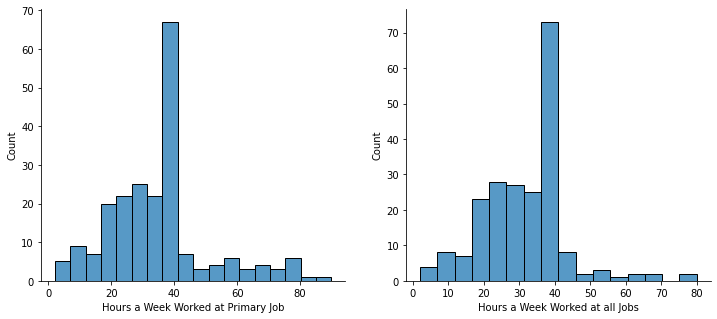

In [11]:
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
fig, ax = plt.subplots(figsize=[12, 5], nrows=1, ncols=2)


p = sns.histplot(data=bus_riders, x='hrs_wk_all_jobs', ax=ax[0])
p.set_xlabel('Hours a Week Worked at Primary Job')

d = sns.histplot(data=bus_riders, x='hrs_wk_prim_job', ax=ax[1])
d.set_xlabel('Hours a Week Worked at all Jobs');

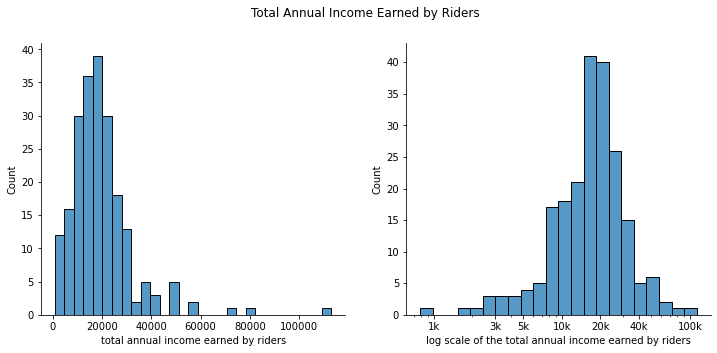

In [12]:
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
fig, ax = plt.subplots(figsize=[12, 5], nrows=1, ncols=2)


p = sns.histplot(data=bus_riders, x='annual_inc', ax=ax[0])
p.set_xlabel('total annual income earned by riders')

d = sns.histplot(data=bus_riders, x='annual_inc',log_scale=True, ax=ax[1])
d.set_xlabel('log scale of the total annual income earned by riders')
plt.xticks([1000,3000, 5000, 10000, 20000, 40000, 100000], ['1k','3k','5k', '10k', '20k', '40k', '100k'])

plt.suptitle('Total Annual Income Earned by Riders');

In [13]:
bus_riders.corr()

,recordid,number_of_jobs,wage_primary_job,hrs_wk_prim_job,hrs_wk_all_jobs,avg_wage_other_jobs,num_buses_get_to_work,mins_last_stop_to_work,mins_bus_home_to_work,mins_bus_work_to_home,hrs_wk_on_bus_to_work,with_car_mins_to_work,on_sunday_use_bus_wrk,on_monday_use_bus_wrk,on_tuesday_use_bus_wrk,on_wednesday_use_bus_wrk,on_thursday_use_bus_wrk,on_friday_use_bus_wrk,on_saturday_use_bus_wrk,dont_use_bus_wrk,night_bus_to_wrk,taxi_get_to_wrk,cost_of_taxi_to_wrk,penalty_late_wrk1,penalty_late_wrk2,penalty_late_wrk3,penalty_late_wrk4,penalty_late_wrk5,chose_job_on_bus_route,trn_dwn_job_not_bus_route,lost_job_route_chnge,time_find_new_job,wage_old_vs_new_job,wage_new_vs_old_job,reject_promot_bus_sched,prmote_pay_wage,satisfied_bus_predict,male,birth_year,age,race_caucasion,race_asian,race_nativehawaian,race_othrpacificislander,race_black,race_americanindian,race_hispanic,race_other,people_in_hh,hh_autos,valid_drivers_license,have_car,have_truck,have_motorcycle,have_scooter,have_bicycle,have_cellphone,have_smartphone,mins_to_get_to_bus_stop,walk_to_bus_stop,pub_tran_for_work,pub_tran_for_school,pub_tran_for_med_appt,pub_tran_for_leisure_act,pub_tran_for_groceries,pub_tran_for_relig_cong,trans_interf_new_job_opp,trans_interf_promotion,trans_interf_wrk_ontime,trans_interf_medic_att,trans_interf_everday_tasks,trans_interf_school_class,bus_grocer_less_fruit_veg,bus_grocer_less_cans_food,bus_grocer_less_raw_meat,bus_grocer_more_dried_food,bus_grocer_more_snack_food,bus_grocer_more_fast_food,bus_time_get_to_doctor,vehicle_time_to_doctor,bus_system_finane_goals,rate_pub_tran_system_num,wage_of_turned_dwn_job_num,years_used_pub_tran_corr,nonhiswhite,nonhisblack,hispanic,nonhisother,days_a_wk_ride_bus_to_wrk,has_vehicle,employed_full_non_student,employed_part_non_student,employed_and_full_student,less_than_hs_grad,hs_graduate,more_than_hs,education_lvl,bus_no_effect_diet,bus_unhealthy_diet,bus_healthy_diet,hrs_wk_non_prim_jobs,annual_inc,mins_day_home_to_from_work,mins_wk_home_to_from_work,hrs_wk_home_to_from_work
recordid,1.000000,-0.080527,0.009700,0.059303,0.007315,0.217646,-0.008447,-0.195870,-0.061576,-0.060026,0.147397,-0.038669,-0.104114,-0.015363,0.034977,0.031911,0.016110,0.033642,-0.112906,-0.110096,0.013198,-0.115341,0.016544,-0.015841,-0.112489,-0.104473,-0.069715,0.072963,-0.146354,-0.169473,-0.169422,0.097055,0.263642,-0.116124,-0.085420,0.464532,-0.013212,-0.090398,-0.005363,0.005363,0.027351,-0.079622,NaN,0.001768,-0.060130,-0.132678,0.072352,0.100019,-0.017887,-0.019741,0.033422,0.006633,-0.013980,NaN,0.000496,-0.061961,0.203886,-0.044985,-0.130659,0.009521,NaN,-0.190022,-0.062438,-0.033528,-0.057347,-0.212290,-0.064809,-0.115955,0.099149,-0.163839,-0.201852,-0.141523,0.043447,0.023817,0.006259,0.063899,0.096264,0.025715,0.092381,-0.092395,0.007739,-0.065625,-0.113143,-0.155004,0.003673,-0.025060,0.072352,-0.002030,-0.065966,-0.002315,-0.019808,0.042927,-0.084162,-0.054310,0.082578,-0.049558,0.019841,-0.072238,0.119233,-0.038128,-0.085507,-0.014596,-0.063364,-0.100439,-0.115945
number_of_jobs,-0.080527,1.000000,0.155594,0.134893,0.543953,NaN,0.228678,0.059021,0.123171,0.121189,0.144448,-0.050129,0.068409,0.056468,0.079757,-0.071387,0.025754,-0.015069,0.144723,0.157722,-0.065668,-0.030312,-0.012122,0.029049,0.005682,0.153416,-0.042787,-0.108024,0.053902,0.210026,0.096111,-0.126951,0.140845,0.189272,0.090081,0.002745,0.052432,0.006009,0.055988,-0.055988,-0.054083,0.157722,NaN,-0.059675,-0.022092,-0.007684,0.034664,0.049494,0.123950,0.068529,0.061776,0.057056,0.158749,NaN,-0.051558,-0.051558,-0.041616,0.005074,0.034470,0.051558,NaN,0.090081,0.019690,-0.014552,0.003288,0.066525,0.050741,0.173883,0.024857,0.059026,-0.018844,0.109199,0.000854,0.024829,-0.032876,-0.095405,-0.111919,0.070659,-0.125022,-0.010968,0.135388,0.028025,0.197731,0.030212,-0.032195,-0.017502,0.034664,0.044702,0.107354,0.057025,0.077604,-0.061681,-0.059675,-0.108765,-0.079909,0.149028,0.122889,0.027161,-0.125062,0.105278,0.878086,0.489961,0.127325,0.186362,0.21054

In [14]:
for i in range(3):
    for j in range(i):
        print(i, j, sep=",")

1,0
2,0
2,1


In [15]:
corr_matrix = bus_riders.corr()
corr_features = set()
for i in range(corr_matrix.shape[0]):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            col_name = corr_matrix.columns[i]
            corr_features.add(col_name)

In [16]:
len(corr_features)

18

<AxesSubplot:>

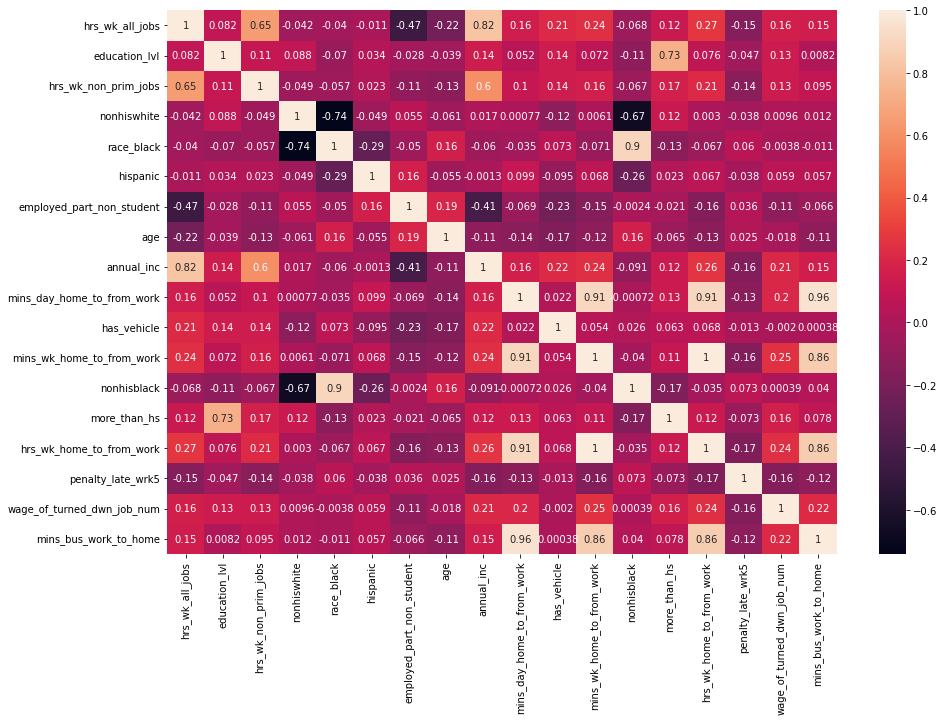

In [17]:
plt.figure(figsize=[15, 10])
plot_col = bus_riders[list(corr_features)]
sns.heatmap(data=plot_col.corr(), annot=True)

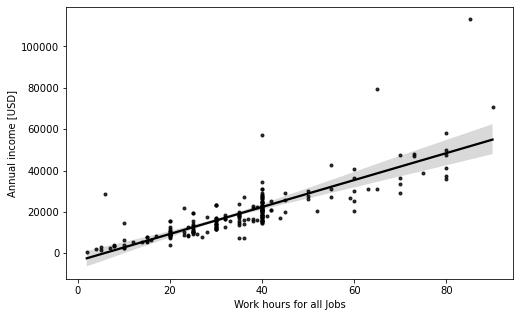

In [18]:
plt.rcParams['axes.spines.top'] = True
plt.rcParams['axes.spines.right'] =True
plt.figure(figsize=(8,5))
sns.regplot(data=bus_riders, y='annual_inc', x='hrs_wk_all_jobs', marker='.', color='black')
plt.xlabel('Work hours for all Jobs')
plt.ylabel('Annual income [USD]');


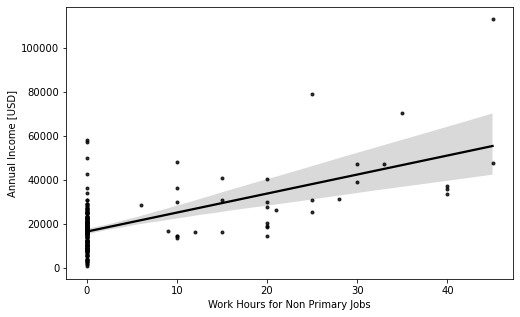

In [19]:
plt.figure(figsize=(8,5))
sns.regplot(data=bus_riders, y='annual_inc', x='hrs_wk_non_prim_jobs', marker='.', color='black')
plt.xlabel('Work Hours for Non Primary Jobs')
plt.ylabel('Annual Income [USD]');